In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset

### DATASET açıklaması
Veri seti şu konularda bilgi içermektedir:

* Son bir ay içinde ayrılan müşteriler – sütuna "Churn" adı verilir
* Her müşterinin kaydolduğu hizmetler – telefon, çoklu hatlar, internet, çevrimiçi güvenlik, çevrimiçi yedekleme, cihaz koruması, teknik destek ve TV ve film yayını
* Müşteri hesap bilgileri: Müşterinin ne kadar süredir müşteri olduğu, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
* Müşteriler hakkında demografik bilgiler – cinsiyet, yaş aralığı ve eşleri ve bakmakla yükümlü oldukları kişiler olup olmadığı

Amaçlar
Verileri inceleyeceğim ve şu gibi bazı soruları yanıtlamaya çalışacağım:

* Kayıp müşterilerin ve aktif hizmetlerle devam eden müşterilerin yüzdesi nedir? (kayıp : %26, Devam eden  : %73)
* Cinsiyete göre Kayıp müşteriler de herhangi bir kalıp var mı? (Hayır Yok, değerler yakın.)
* Sağlanan hizmet türüne göre Churn Müşterilerde herhangi bir kalıp/tercih var mı?(sağlanan ek servisleri tercih eden müşteriler abonelikte kalmaya daha yatkın.)

### Uygulama ve Çözüm
1. Hedef: Müşteri Kaybını Tahmin Etmek
Müşterinin şirketi terk edip etmeyeceğini tahmin eden bir makine öğrenimi modeli geliştireceğiz. Modelden çıkan sonuçlarla, risk altındaki müşteriler tespit edilip uygun aksiyonlar alınabilir.

2. Adım Adım Uygulama
Veri Hazırlığı
Veri setini yükleyip temizleyeceğiz. Eksik değerleri dolduracak, kategorik değişkenleri encode edeceğiz.

* Keşifsel Veri Analizi (EDA)

Müşteri kaybını etkileyen faktörleri belirlemek için analiz yapacağız.
Hangi hizmet türlerinin kayıpla daha çok ilişkili olduğunu inceleyeceğiz.

* Makine Öğrenimi Modeli

Churn durumu (evet/hayır) tahmini için bir sınıflandırma modeli kuracağız (örneğin, Logistic Regression veya Random Forest).
Modelin doğruluğunu değerlendireceğiz.
Sonuç ve Öneriler

Kaybı azaltmak için segmentlere uygun stratejiler önerilecektir.

In [3]:
data = pd.read_csv("telco_customer_churn.csv")
df = data.copy()
df.head(2).T

,0,1
customerID,7590-VHVEG,5575-GNVDE
gender,Female,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
tenure,1,34
PhoneService,No,Yes
MultipleLines,No phone service,No
InternetService,DSL,DSL
OnlineSecurity,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.drop(["customerID","MultipleLines"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.loc[df["TotalCharges"] == " "].head()
#totalcharges sütununda boş değerler var.Bunları ilk başta numerik değere çevir.Ve doldur

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [9]:
# 11 adet missing value old. için hepsini çağırdık.Ve bu verilerin yeni kontrat olduğunu gördük.aylık harcama ile doldurabiliriz.
df.loc[df["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df.loc[df["tenure"]==0]
#tenure = 0 ise para verilmemiş olduğu görülüyor.Ama değere 0 yazmak yerine 1 aylık parayı yazabiliriz.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df["TotalCharges"] = df["TotalCharges"].fillna(df['MonthlyCharges'])

In [12]:
df.isna().sum()
#Missing Value kalmadı.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### EDA (Keşifçi Veri Analizi)

Hangi değişkenin müşteri kaybına etki ettiğini grafik üzerinde belirleyeceğiz.

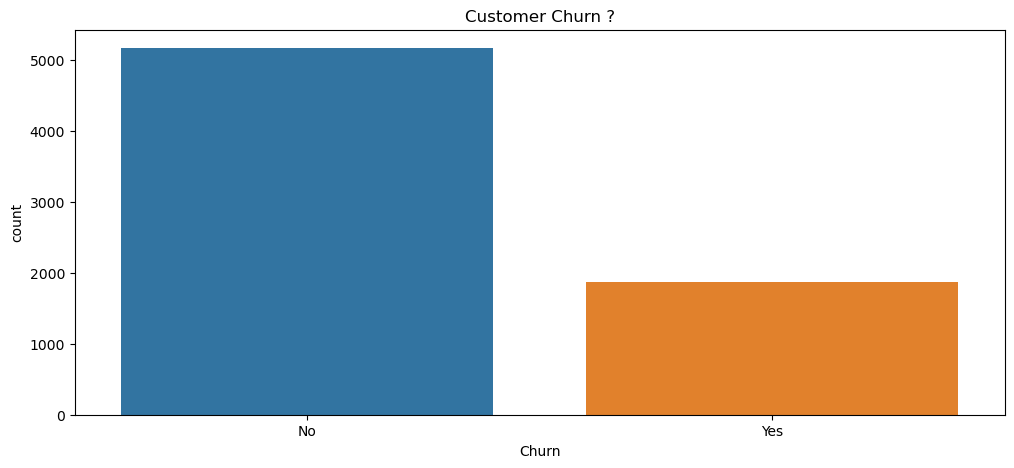

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x="Churn",);
plt.title("Customer Churn ?");

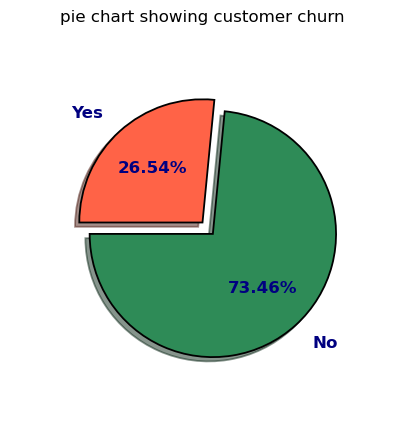

In [14]:
plt.figure(figsize=(12,5))
plt.title("pie chart showing customer churn");
plt.pie(x=df['Churn'].value_counts(),labels=['No','Yes'],colors=['seagreen','tomato'],autopct='%.2f%%',pctdistance=0.6,shadow=True,labeldistance=1.2,startangle=180,radius=0.8,
wedgeprops={'linewidth' : 1.3,
           'edgecolor' : 'black',
           'antialiased': True},
        textprops={'fontsize':12,
                   'color' : 'navy',
                   'fontweight' : "bold"},
        rotatelabels=False,explode=[0.1,0]
);
#labels : pastada kaç dilim olacaksa o kadar etiket ve ismi olmalı bunu liste de verebiliriz ,[] içinde de verebiliriz.
#colors : dilimlerin renkleri.liste gibi de verilebilir
#autopct : dilimlere yüzdelik yyazar .2f%% noktadan sonrayı ve yüzdeyi belirtir.
#pctdistance : iki yüzde arasındaki uzaklık
#Shadow : grafikte gölge aç kapa
#label distance : labellar arası uzaklık.
#startangle : pasta grafiğini çevirir (180 derece çevirdim)
#radius : dairenin yarıçapı artarsa daire büyür.
#wedgeprops : dairenin kenarlarını ayarlar.
#textprops : text i ayarlar renk,boyut vs.
#rotatelabels : False olsun , label çevirir.
#hatch : grafiğin içine direk (//,/,.,+,*) gibi karakterlerle doldurur görseldir.

In [15]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
#Gender
gender_churn_total = df[df["Churn"] == "Yes"]["gender"].value_counts()
gender_churn_total

Female    939
Male      930
Name: gender, dtype: int64

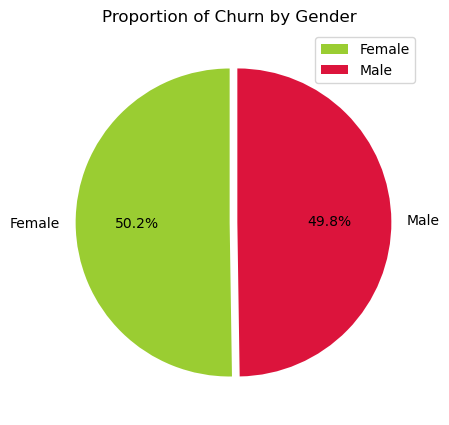

In [17]:
plt.figure(figsize=(8,5))
plt.pie(gender_churn_total,explode=[0,0.05],autopct="%.1f%%",colors=["yellowgreen","crimson"],labels=['Female','Male'],startangle=90);
plt.title("Proportion of Churn by Gender")
plt.legend(['Female','Male']);

Kaybedilen Müşterilen cinsiyet oranları hemen hemen birbirine yakın.

In [18]:
#Senior Citizen
senior_citizen_data = df[df["Churn"] == "Yes"]["SeniorCitizen"].value_counts()
senior_citizen_data

0    1393
1     476
Name: SeniorCitizen, dtype: int64

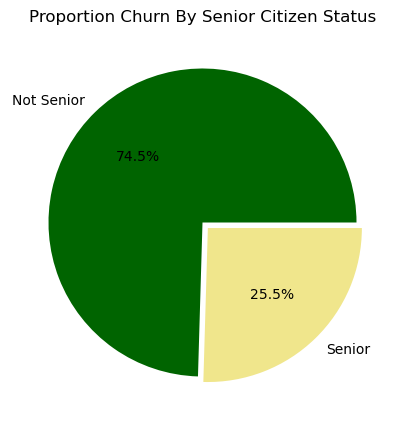

In [19]:
plt.figure(figsize=(8,5))
plt.pie(senior_citizen_data,explode=[0,0.05],labels=["Not Senior","Senior"],colors=["darkgreen","khaki"],autopct="%2.1f%%")
plt.title("Proportion Churn By Senior Citizen Status");

kayıp müşterilerin % 75 i 65 yaşın altında, % 25 ise 65 yaş üstü kullanıcılardan oluşuyor.

In [20]:
# Verileri 'Contract' ve 'churn' sütununa göre gruplandır.
contract_churn_counts = df.groupby(['Contract','Churn']).size().unstack()
contract_churn_counts

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


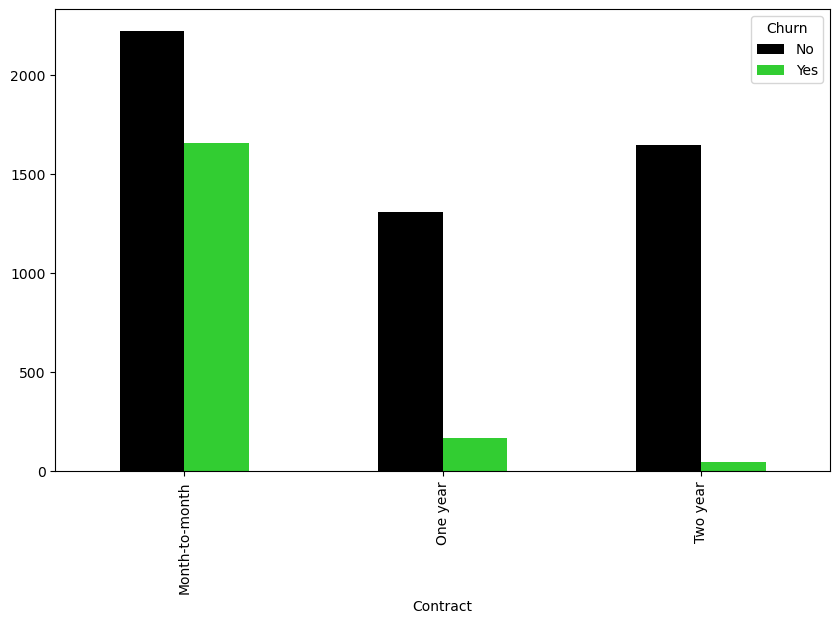

In [21]:
#plot grouped bar chart
contract_churn_counts.plot(kind='bar', figsize=(10, 6), color=['black','limegreen']);

Aylık sözleşmeli kullanıcıların üyelikten ayrılma eğiliminde olduğunu açıkça görebiliyoruz

In [22]:
payment_churn_counts = df.groupby(["PaymentMethod","Churn"]).size().unstack()
payment_churn_counts

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


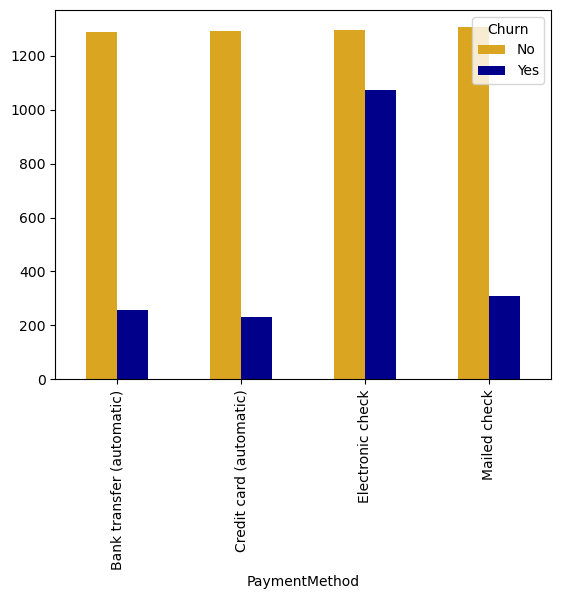

In [23]:
payment_churn_counts.plot(kind="bar", color=["goldenrod","darkblue"]);

Kaybedilen müşteriler arasında "Electronic check"  kontrolü ile ödeme yapan müşteriler daha çok ayrılık göstermiş.
* Elektronik yolla ödeyip de üyelik sonlandıran müşterilerin sayısı diğer ödeme yöntemlerine göre daha yüksek olduğundan Kredi kartı veya otomatik banka ödemesine yönlendirme yapabilir.Öneri verilebilir.


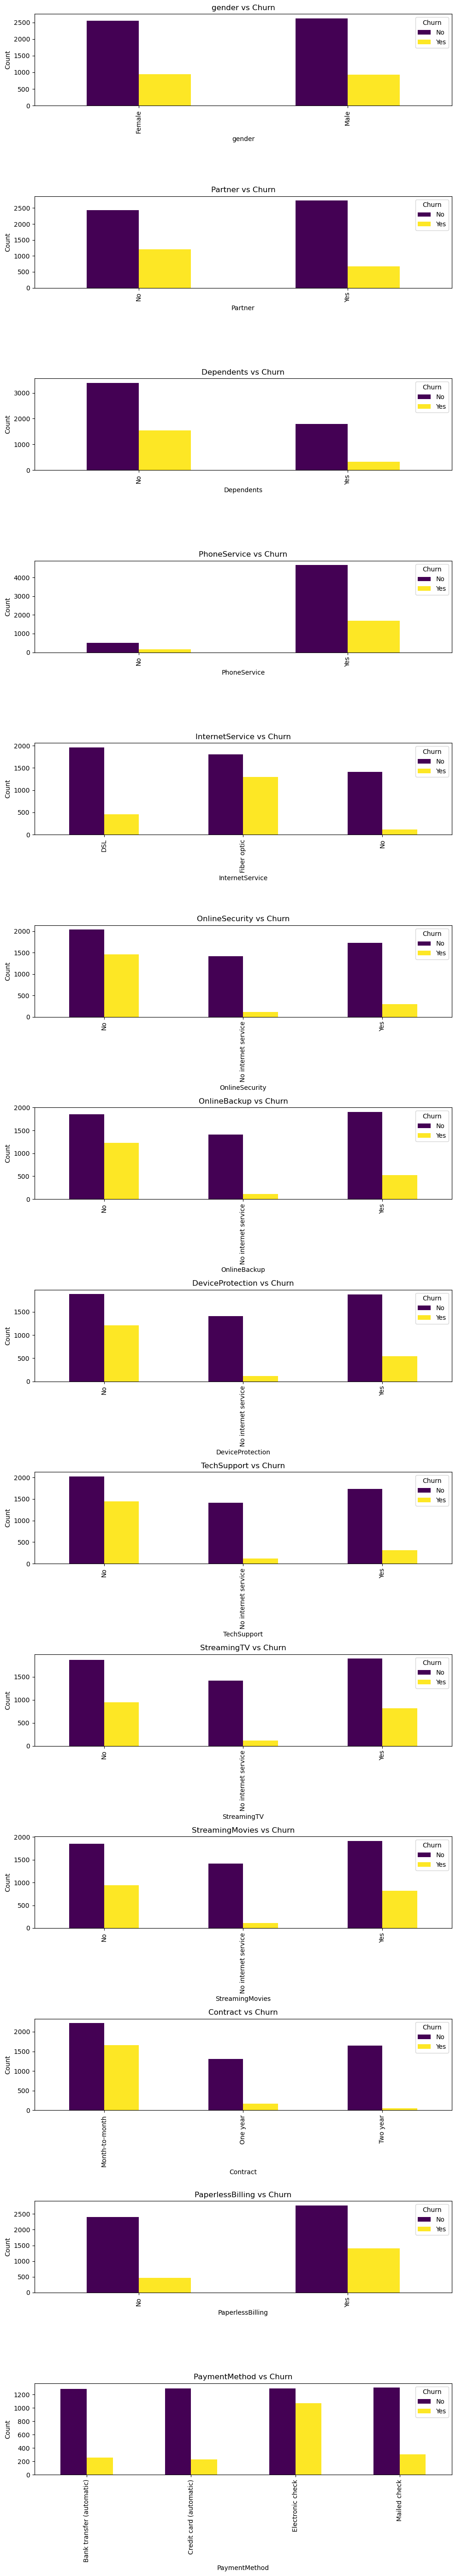

In [24]:
# Kategorik değişkenlerin seçilmesi
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'Churn']  # 'Churn' hariç

# Subplot oluşturma
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, len(categorical_columns) * 4))
# 14 değişken var churn ile, ncols 1 olcak, figsize=(10, 14*4)

for i, col in enumerate(categorical_columns): # boş grafiklere tüm bar grafiklerini bu fonksiyon geçirecek.
    ax = axes[i] if len(categorical_columns) > 1 else axes
    churn_counts = df.groupby([col, 'Churn']).size().unstack() # churn ve diğer sütunu gruplandır.
    churn_counts.plot(kind='bar', ax=ax, colormap='viridis')  #plot ve diğer ayarlar
    ax.set_title(f'{col} vs Churn')  # grafik başlığı
    ax.set_ylabel('Count') #y tarafı
    ax.set_xlabel(col)   # x tarafı
    
plt.tight_layout()  # grafikler arasında boşluk bırak karışmasın
plt.show() #grafikleri göster

### Numerical Features

Sadece üç sayısal sütun vardır: 'tenure', 'MonthlyCharges','TotalCharges'   Olasılık yoğunluk dağılımı seaborn kdeplot işlevi kullanılarak tahmin edilebilir.

In [25]:
def kdeplot(feature):  # feature içeren fonksiyon
    plt.figure(figsize=(9, 4)) # figure oluştur
    plt.title("KDE for {}".format(feature))  #farklı değişkenler için title
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature], color = 'navy', label = 'Churn: No')  #churn : no için kdeplot
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature], color = 'red', label = 'Churn: Yes') # churn  :  yes için kdeplot
    plt.legend()
    

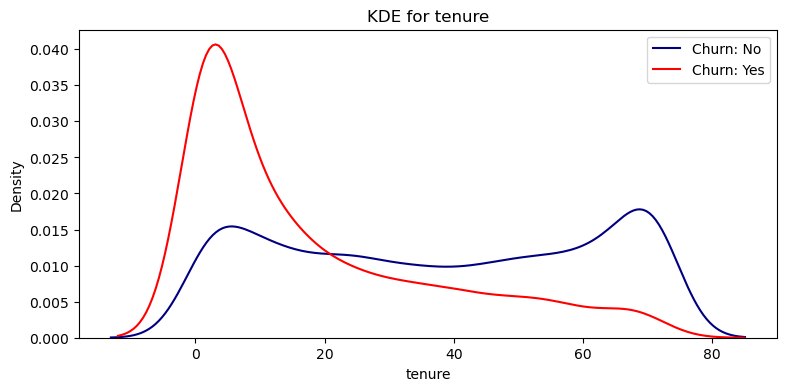

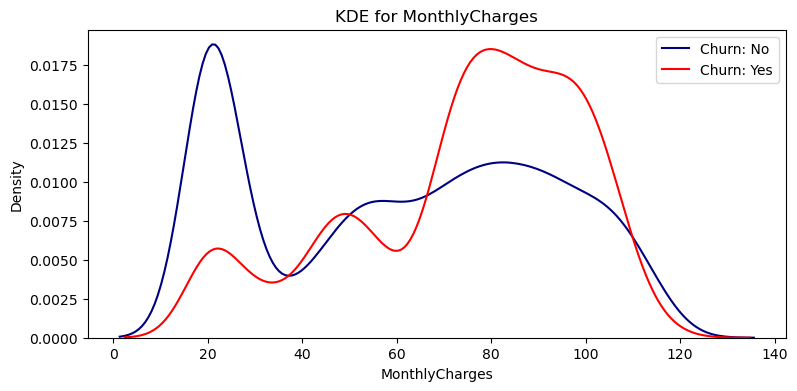

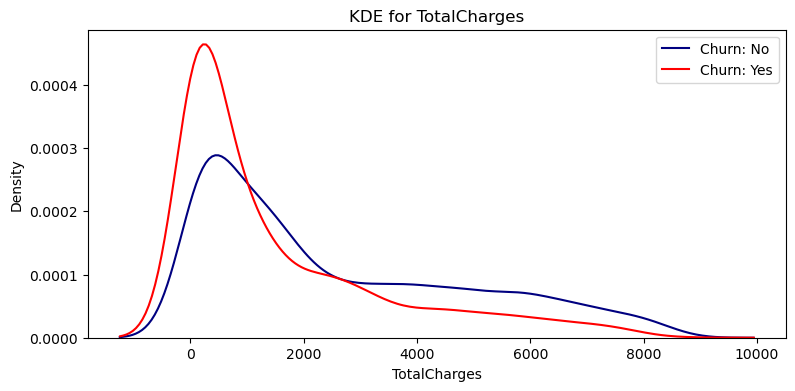

In [26]:
kdeplot("tenure")
kdeplot('MonthlyCharges')
kdeplot("TotalCharges")

* Kde for tenure : 
 0-12 yani ilk yıl içerisinde firmadan ayrılanlar daha yoğunlukta.
 Bu, yeni müşterilerin şirkette daha az kalma eğiliminde olduğunu veya erken aşamada bir memnuniyetsizlik yaşadığını gösteriyor olabilir.
 Tenure arttıkça churn olasılığı azalmış gibi görünüyor.
 Ayrılmayan müşteriler (Churn: No) için hizmet süresi daha geniş bir aralığa yayılmış durumda.
 Özellikle 40-70 ay arasında bir yoğunluk gözlemleniyor, bu da uzun süre hizmet alan müşterilerin daha sadık olabileceğini gösterebilir.

* kde for MonthlyCharges : 
Düşük aylık ücretlere (20-40 arası) sahip müşteriler arasında "Churn: No" yoğunluğu yüksek.
Bu, düşük ücretli planlara sahip müşterilerin şirketten daha az ayrılma eğiliminde olduğunu gösterebilir.
Ancak yüksek aylık ücretlere sahip müşterilerde de bir yoğunluk var, bu da bazı yüksek ücretli müşterilerin sadık olduğunu gösteriyor olabilir.
Aylık ücreti 70-120 arası olan müşterilerin churn oranı daha yüksek.
Bu, daha yüksek fiyatlı planlara sahip müşterilerin memnuniyetsizlik ya da fiyat-performans beklentisi nedeniyle şirketten ayrılma olasılığının daha yüksek olduğunu gösterebilir.

* kde for Total Charges : 
Ayrılan müşterilerin 0-2000 Aralığında olduğu gözlemleniyor.
Ayrılmayan müşterilerin dağılımı daha geniş bir alana yayılmış durumda ve 2000'in üstündeki toplam ücret aralıklarında yoğunlaşma görülüyor.

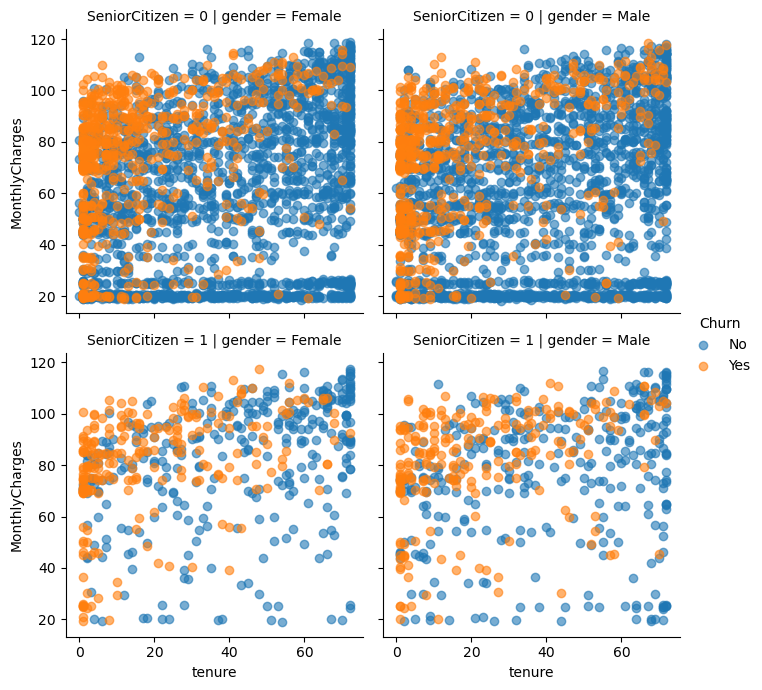

In [27]:
#Koşullu ilişkileri gözlemleyebilmek için scatter plot oluşturma
g = sns.FacetGrid(data=df, row='SeniorCitizen', col='gender', hue='Churn', height=3.5)
g.map(plt.scatter, 'tenure','MonthlyCharges', alpha=0.6);
g.add_legend()

* 'tenure' arttıkça müşteri kaybı da azalıyor şekline gözlemlenebilir.
* 'gender'  cinsiyet olarak bakıldığında fark belirgin değil.

In [28]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [29]:
### Correlation Matrix

In [30]:
#korelasyon matrisi için 'Churn' numerik yapalım.
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes'  else  0)

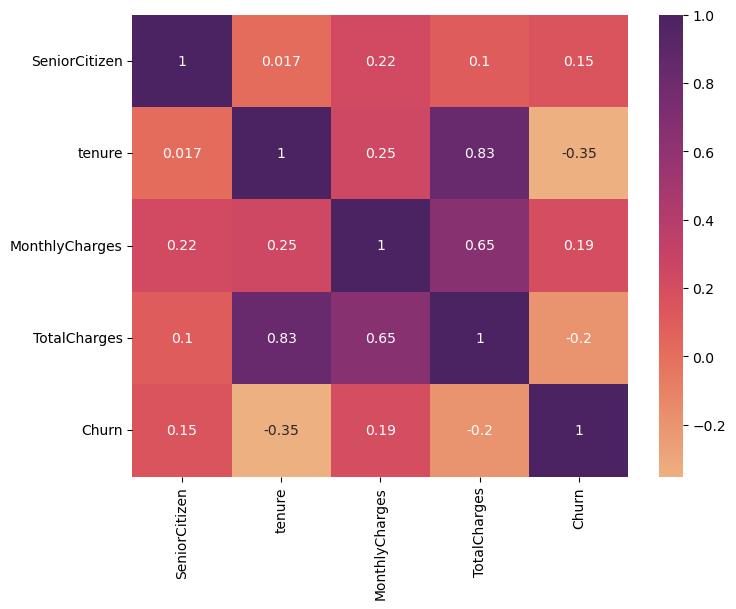

In [31]:
def corr_heatmap(df):
    corr_matrix = df.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(),annot=True,cmap='flare')
    plt.show()
    
    
corr_heatmap(df)

* "tenure" ile "TotalCharges" arasında Pozitif yönde güçlü bir ilişki vardır.Ama bu barizdir Çünkü Churn olmayan müşteriler tenure yüksek ise totalcharge da yüksek olacaktır.
* 'TotalCharges' ile 'MonthlyCharges' arasında pozitif yönde güçlü bir ilişki vardır.
* 'tenure' ve 'Churn' arasında negatif yönde zayıf bir ilişki vardır.Bu ise sadık olmayan kısa süredir abone olan müşterilerin abonelikten çıkma eğiliminin olduğunu gösterebilir.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [33]:
#Preprocessing : Label Encoding , 

In [34]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder,OrdinalEncoder

In [35]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()
print(numeric_cols)
print(categorical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [36]:
#Kategorik sütunları encode etmek.
encoder = LabelEncoder()

def encoding(cols):
    for i in cols:
        df[i] = encoder.fit_transform(df[i])

encoding(categorical_cols)

In [37]:
#Numerik sütunları standart hale getirme
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
#'SeniorCitizen' kategorik olduğu için çıkarabiliriz.
#'Churn' hedef değişken olduğu için numerik sütunlardan çıkarmak gerekir.
numeric_cols.remove('SeniorCitizen')
numeric_cols.remove('Churn')
numeric_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [39]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[numeric_cols])
df[numeric_cols] = scaled_data
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992667,0
1,1,0,0,0,0.066327,1,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172198,0
2,1,0,0,0,-1.236724,1,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958122,1
3,1,0,0,0,0.514251,0,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193706,0
4,0,0,0,0,-1.236724,1,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938930,1


In [40]:
df.isna().sum().sum()

0

In [41]:
#train-test split and modelling

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [43]:
X = df.drop('Churn',axis=1)
y = df['Churn']
X.shape, y.shape

((7043, 18), (7043,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 18), (1409, 18), (5634,), (1409,))

In [45]:
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)      #makine öğrenmesine koyarken pandas yani seri cinsinden olunca hata veriyor.Bu yüzden seriyi "to numpy" şekline getiriyoruz.
type(X_test),type(X_train)

(numpy.ndarray, numpy.ndarray)

In [46]:
models = {'kne': KNeighborsClassifier(),
         'rfc' : RandomForestClassifier(),
         'dc': DecisionTreeClassifier(),
         'lr' : LogisticRegression(),
         'svc' : SVC()}

In [47]:
models

{'kne': KNeighborsClassifier(),
 'rfc': RandomForestClassifier(),
 'dc': DecisionTreeClassifier(),
 'lr': LogisticRegression(),
 'svc': SVC()}

In [48]:
trained_models = {}   # fonksiyonda eğitilen modelleri dışarıya çıkarmak için boş bir sözlük.

In [49]:
def modelling_func(X_train,y_train):
    global trained_models
    for name,model in models.items():
        model.fit(X_train,y_train)
        trained_models[name] = model
        print(f"{model} eğitildi.")
modelling_func(X_train,y_train)

KNeighborsClassifier() eğitildi.
RandomForestClassifier() eğitildi.
DecisionTreeClassifier() eğitildi.
LogisticRegression() eğitildi.
SVC() eğitildi.


In [50]:
#Evaluation

In [51]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
def accuracy_func(X_test, y_test):
    for name,model in  trained_models.items():
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        print(f"({name} için accuracy değerleri: {accuracy * 100:.2f}%")
        
accuracy_func(X_test,y_test)    

  File "C:\Users\Nuri\anaconda3\envs\nurienv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(kne için accuracy değerleri: 77.15%
(rfc için accuracy değerleri: 79.56%
(dc için accuracy değerleri: 72.32%
(lr için accuracy değerleri: 81.90%
(svc için accuracy değerleri: 81.33%


En iyi doğruluğu veren model Logistic Regression modeli gözlemleniyor.

In [53]:
print("kne", classification_report(y_test,trained_models['kne'].predict(X_test)))
print("rfc", classification_report(y_test,trained_models['rfc'].predict(X_test)))
print("dc", classification_report(y_test,trained_models['dc'].predict(X_test)))
print("lr", classification_report(y_test,trained_models['lr'].predict(X_test)))
print("svc", classification_report(y_test,trained_models['svc'].predict(X_test)))

kne               precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409

rfc               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

dc               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.48      0.48       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409

lr      

In [54]:
best_model = trained_models['lr']
y_preds = best_model.predict(X_test)
y_preds

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [55]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[934, 102],
       [153, 220]], dtype=int64)

In [56]:
# yeni bir kullanıcı eklensin
np.random.seed(42)
ornek_kullanici = X.sample()
ornek_kullanici

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,-1.277445,0,0,0,0,0,0,0,0,0,1,2,-1.328164,-0.994895


In [57]:
best_model.predict(ornek_kullanici)

array([1], dtype=int64)